### setup

In [ ]:
# load libraries
from matplotlib import pyplot as plt
import netCDF4
import numpy as np
import plotly.express as px
import pandas as pd
import zipfile

In [ ]:
# load zip file from drive
with zipfile.ZipFile("drive/MyDrive/lulcc_data.zip","r") as zip_ref:
  zip_ref.extractall("")

In [ ]:
# define NC
class NC():
  def __init__(self,f):
    self.nc = netCDF4.Dataset(f)
  def plot(self):
    plt.figure()
    try:
      plt.imshow(self.nc["LC"][0])
    except:
      pass
    try:
      plt.imshow(self.nc["LC"])
    except:
      pass
    try:
      plt.imshow(self.nc["LU_TYPE"][0])
    except:
      pass
    try:
      plt.imshow(self.nc["LCC"])
    except:
      pass
    plt.gca().invert_yaxis()
  def stats(self,p=False):
    try:
      arr = np.array(self.nc["LC"][0])
    except:
      pass
    try:
      arr = np.array(self.nc["LU_TYPE"][0])
    except:
      pass
    try:
      arr = np.array(self.nc["LC"])
    except:
      pass
    try:
      arr = np.array(self.nc["LCC"])
    except:
      pass
    unique,counts = np.unique(arr,return_counts=True)
    stats = dict(zip(unique,counts))
    stats_arr = []
    try:
      del stats[0]
    except:
      pass
    for i in stats.keys():
      try:
        int(i)
        stats_arr.append(stats[i])
      except:
        pass
    if p == True:
      stats_p_arr = []
      for i in range(len(stats_arr)):
        stats_p_arr.append(stats_arr[i]/sum(stats_arr)*100)
      return stats_p_arr
    else:
      return stats_arr

### history

[98790, 2121, 14849, 19932, 3389, 913, 4864]

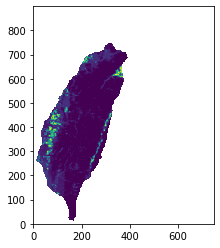

In [ ]:
# show 1904_7PFT.nc
NC("lulcc_data/history/2019_7PFT.nc").plot()
NC("lulcc_data/history/2019_7PFT.nc").stats()

In [ ]:
# plot history land use land cover change over time (percentage)
h = ["1904","1956","1982","1995","2000","2010","2015","2019"]
l = []
for i in h:
  tmp = NC("lulcc_data/history/"+i+"_7PFT.nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df[5] = pd.to_numeric(df[5])
df[6] = pd.to_numeric(df[6])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Agri (Non-Irriagte)",3:"Built-up land",4:"Inland Water",5:"Bare Soil",6:"Agri (Irrigate)",7:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Agri (Non-Irriagte)","Built-up land","Inland Water","Bare Soil","Agri (Irrigate)"])
fig.show()

### SPOT

[96614, 6535, 23257, 14774, 2399, 1279]

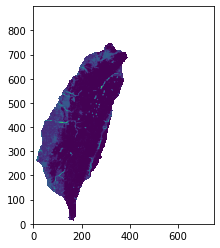

In [ ]:
# show LC_2015_SPOT.nc
NC("lulcc_data/SPOT/LC_2015_SPOT.nc").plot()
NC("lulcc_data/SPOT/LC_2015_SPOT.nc").stats()

In [ ]:
# plot SPOT land use land cover change over time (percentage)
h = ["2015","2019"]
l = []
for i in h:
  tmp = NC("lulcc_data/SPOT/LC_"+i+"_SPOT.nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df[5] = pd.to_numeric(df[5])
df = df.rename(columns={0:"Forest",1:"Grass",2:"Agri",3:"City",4:"Water",5:"Soil",6:"Year"})
fig = px.area(df,x="Year",y=["Forest","Grass","Agri","City","Water","Soil"])
fig.show()

### SSP119

[94111, 31428, 15641, 2399, 1279]

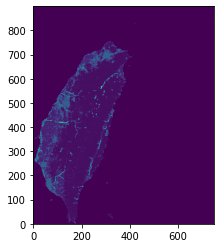

In [ ]:
# show LUH2_119_2016.nc
nc = netCDF4.Dataset("lulcc_data/SSP126_nc/LUH2_126_2016.nc")
NC("lulcc_data/SSP126_nc/LUH2_126_2016.nc").plot()
NC("lulcc_data/SSP126_nc/LUH2_126_2016.nc").stats()

In [ ]:
# plot SSP119 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP119_nc/LUH2_119_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP126

[94111, 31428, 15641, 2399, 1279]

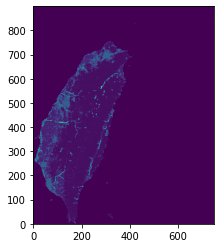

In [ ]:
# show LUH2_126_2016.nc
NC("lulcc_data/SSP126_nc/LUH2_126_2016.nc").plot()
NC("lulcc_data/SSP126_nc/LUH2_126_2016.nc").stats()

In [ ]:
# plot SSP126 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP126_nc/LUH2_126_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP245

[94188, 31358, 15634, 2399, 1279]

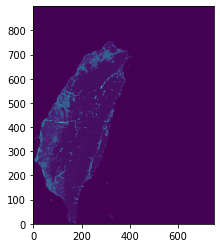

In [ ]:
# show LUH2_245_2016.nc
NC("lulcc_data/SSP245_nc/LUH2_245_2016.nc").plot()
NC("lulcc_data/SSP245_nc/LUH2_245_2016.nc").stats()

In [ ]:
# plot SSP245 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP245_nc/LUH2_245_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP370

[93444, 32101, 15635, 2399, 1279]

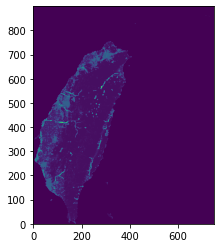

In [ ]:
# show LUH2_370_2016.nc
NC("lulcc_data/SSP370_nc/LUH2_370_2016.nc").plot()
NC("lulcc_data/SSP370_nc/LUH2_370_2016.nc").stats()

In [ ]:
# plot SSP370 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP370_nc/LUH2_370_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP434

[93820, 31724, 15636, 2399, 1279]

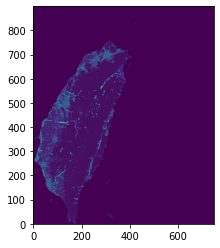

In [ ]:
# show LUH2_434_2016.nc
NC("lulcc_data/SSP434_nc/LUH2_434_2016.nc").plot()
NC("lulcc_data/SSP434_nc/LUH2_434_2016.nc").stats()

In [ ]:
# plot SSP434 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP434_nc/LUH2_434_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP460

[94090, 31455, 15635, 2399, 1279]

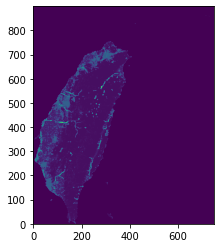

In [ ]:
# show LUH2_460_2016.nc
NC("lulcc_data/SSP460_nc/LUH2_460_2016.nc").plot()
NC("lulcc_data/SSP460_nc/LUH2_460_2016.nc").stats()

In [ ]:
# plot SSP460 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP460_nc/LUH2_460_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP534

[93418, 32127, 15635, 2399, 1279]

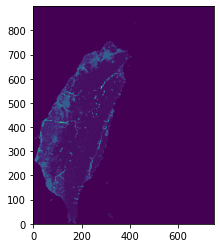

In [ ]:
# show LUH2_534_2016.nc
NC("lulcc_data/SSP534_nc/LUH2_534_2016.nc").plot()
NC("lulcc_data/SSP534_nc/LUH2_534_2016.nc").stats()

In [ ]:
# plot SSP534 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP534_nc/LUH2_534_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()

### SSP585

[93147, 32401, 15632, 2399, 1279]

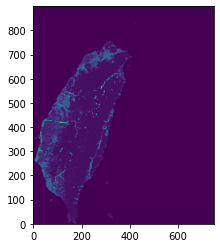

In [ ]:
# show LUH2_585_2016.nc
NC("lulcc_data/SSP585_nc/LUH2_585_2016.nc").plot()
NC("lulcc_data/SSP585_nc/LUH2_585_2016.nc").stats()

In [ ]:
# plot SSP585 land use land cover change over time (percentage)
h = []
for i in range(2016,2100):
  h.append(i)
l = []
for i in h:
  tmp = NC("lulcc_data/SSP585_nc/LUH2_585_"+str(i)+".nc").stats(p=True)
  tmp.append(i)
  l.append(tmp)
l = np.array(l)
df = pd.DataFrame(l)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df[2] = pd.to_numeric(df[2])
df[3] = pd.to_numeric(df[3])
df[4] = pd.to_numeric(df[4])
df = df.rename(columns={0:"Forests",1:"Grasslands",2:"Built-up land",3:"Inland Water",4:"Bare Soil",5:"Year"})
fig = px.area(df,x="Year",y=["Forests","Grasslands","Built-up land","Inland Water","Bare Soil"])
fig.show()